# **Text classification with Hugging Face Transformers (distilBERT) in python**

In [ ]:
import pandas as pd
#import the library for reading the data

In [ ]:
data=pd.read_csv('/content/file1.csv')

In [ ]:
data

,Unnamed: 0,current_title,target
0,0,CEO,1
1,1,Vice President,0
2,2,Information System Manager,0
3,3,Lead Technical Recruiter,0
4,4,VP - Shared Service Technology,0
...,...,...,...
884,884,Chief Compliance Officer,0
885,885,Sales Manager,0
886,886,REALTOR®,0
887,887,Enterprise Sales at SILK.US,0


In [ ]:
data.info()
#check the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     889 non-null    int64 
 1   current_title  889 non-null    object
 2   target         889 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 21.0+ KB


In [ ]:
data=data.drop(columns=['Unnamed: 0'],axis=1)

#remove un necessary data

In [ ]:
data

#data show

,current_title,target
0,CEO,1
1,Vice President,0
2,Information System Manager,0
3,Lead Technical Recruiter,0
4,VP - Shared Service Technology,0
...,...,...
884,Chief Compliance Officer,0
885,Sales Manager,0
886,REALTOR®,0
887,Enterprise Sales at SILK.US,0


In [ ]:
catagories =['not cxo'," cxo"]

#our catagories

In [ ]:
pip install ktrain  # version 0.23.2

#importing refer library for keras and tensor flow so we will use this for hugging face transformer use

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

#settings to set for gpu use and plot are used inline of gpu 


In [ ]:
import ktrain 
from ktrain import text

#import library and

In [ ]:
data['target'].unique()

array([1, 0])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   current_title  889 non-null    object
 1   target         889 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.0+ KB


In [ ]:
type(data["current_title"])

pandas.core.series.Series

In [ ]:
input=data['current_title']
classs=data.target

In [ ]:
input1=list(input)

In [ ]:
classs1=list(classs)

In [ ]:
type(classs1)

list

In [ ]:
len(input1),len(classs1)


(889, 889)

# **spliting the data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(input1, classs1, test_size=0.25, random_state=42)


In [ ]:
len(x_train),len(x_test)

(666, 223)

In [ ]:
len(y_train),len(y_test)

(666, 223)

In [ ]:
#input1=data.current_title

In [ ]:
#len(input1)

889

In [ ]:
#x_test

In [ ]:
#list(input1)

##**Build Ml model with transformer**

In [ ]:
model_name="distilbert-base-uncased" 

#distil bert model is fast and base model and its case insentive 

In [ ]:
trans=text.Transformer(model_name, maxlen=512,class_names=catagories)

#get the transformer and save and max length of tokenization is 512

# **Pre process the train data and test data**

# **pre pare the data for transformer model**

In [ ]:
train_data=trans.preprocess_train(x_train,y_train)
test_data=trans.preprocess_test(x_test,y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 4
	95percentile : 9
	99percentile : 12


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 4
	95percentile : 9
	99percentile : 11


# **classifier of distil bert**

In [ ]:
model=trans.get_classifier()



## **now** we got classifier we need to get the learner 

In [ ]:
learner1=ktrain.get_learner(model,train_data=train_data,val_data=test_data,batch_size=16)

#fix the learning rate 

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
41/41 [==============================] - 38s 923ms/step - loss: 0.6805 - accuracy: 0.6296
Epoch 2/10
41/41 [==============================] - 38s 933ms/step - loss: 0.6652 - accuracy: 0.6954
Epoch 3/10
41/41 [==============================] - 38s 916ms/step - loss: 0.5856 - accuracy: 0.7154
Epoch 4/10
41/41 [==============================] - 38s 924ms/step - loss: 0.1287 - accuracy: 0.9738
Epoch 5/10
41/41 [==============================] - 38s 920ms/step - loss: 0.1613 - accuracy: 0.9585
Epoch 6/10
41/41 [==============================] - 38s 924ms/step - loss: 0.7256 - accuracy: 0.7308
Epoch 7/10
41/41 [==============================] - 37s 914ms/step - loss: 0.7038 - accuracy: 0.6723
Epoch 8/10
41/41 [==============================] - 37s 906ms/step - loss: 413.1623 - accuracy: 0.6662


done.
Visually inspect loss plot and select learning rate associated with falling loss


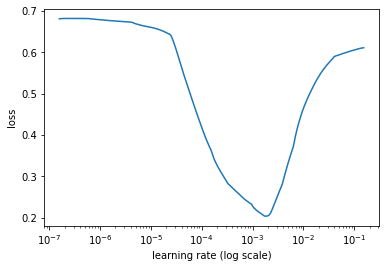

In [ ]:
learner1.lr_find(show_plot=True,max_epochs=10)

# fix the learning rate

In [ ]:
learner1.fit_onecycle(1e-3,2)

#train the data



begin training using onecycle policy with max lr of 0.001...
Epoch 1/2
42/42 [==============================] - 41s 977ms/step - loss: 0.5664 - accuracy: 0.7432 - val_loss: 0.6295 - val_accuracy: 0.7175
Epoch 2/2
42/42 [==============================] - 39s 919ms/step - loss: 0.6181 - accuracy: 0.7057 - val_loss: 0.6025 - val_accuracy: 0.7175


In [ ]:
learner1

In [ ]:
 learner1.validate()

 #validate the data

              precision    recall  f1-score   support

           0       0.72      1.00      0.84       160
           1       0.00      0.00      0.00        63

    accuracy                           0.72       223
   macro avg       0.36      0.50      0.42       223
weighted avg       0.51      0.72      0.60       223



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[160,   0],
       [ 63,   0]])

In [ ]:
learner1.validate(class_names=catagories)

              precision    recall  f1-score   support

     not cxo       0.72      1.00      0.84       160
         cxo       0.00      0.00      0.00        63

    accuracy                           0.72       223
   macro avg       0.36      0.50      0.42       223
weighted avg       0.51      0.72      0.60       223



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[160,   0],
       [ 63,   0]])

In [ ]:
#The data not performing well 

In [ ]:
learner1.view_top_losses(n=5,preproc=trans)

----------
id:62 | loss:1.47 | true:not cxo | pred:cxo)

----------
id:176 | loss:1.47 | true:not cxo | pred:cxo)

----------
id:152 | loss:1.47 | true:not cxo | pred:cxo)

----------
id:6 | loss:1.47 | true:not cxo | pred:cxo)

----------
id:86 | loss:1.47 | true:not cxo | pred:cxo)



In [ ]:
x_test[62]

'COO | Head of Transformation | Head of QA'

In [ ]:
x_test[176]

'CIO - Asia Pacific'

In [ ]:
x_test[152]

'CMO & EVP'

In [ ]:
x_test[6]

'Strategic Consultant to CIO'

In [ ]:
x_test[86]

'CFO Clearance and Collateral Management'

# **predict on new data**

In [ ]:
predictor=ktrain.get_predictor(learner.model,preproc=trans)

#tans=transformer 

In [ ]:
xx2="chief assistant"

In [ ]:
predictor.predict(xx2)

'cxo'